In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.shape

(9134, 24)

In [4]:
#data.info()

In [5]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### Converting date to no. of days

In [6]:
data['Effective To Date'].min()

'1/1/2011'

In [7]:
data['Effective To Date'].max()

'2/9/2011'

In [8]:
data['Effective To Date'].head()

0    2/24/2011
1    1/31/2011
2    2/19/2011
3    1/20/2011
4     2/3/2011
Name: Effective To Date, dtype: object

In [9]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## UNIVARIATE ANALYSIS

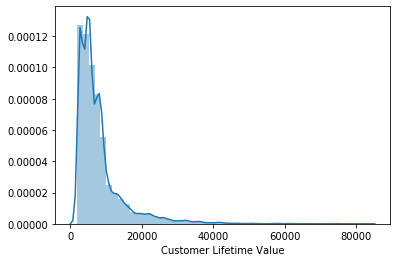

In [10]:
sns.distplot(data['Customer Lifetime Value'])

### Target is right skewed

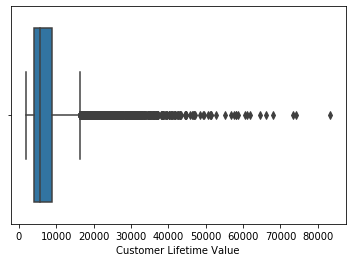

In [11]:
sns.boxplot(data['Customer Lifetime Value'])
plt.show()

### Skewness is due to outliers
### Some customers have very high CLV
### Outlier treatment not required

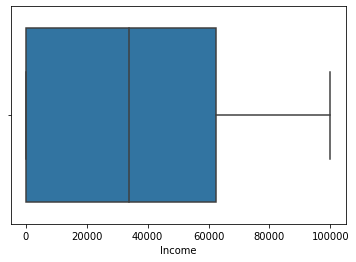

In [12]:
sns.boxplot(data['Income'])
plt.show()

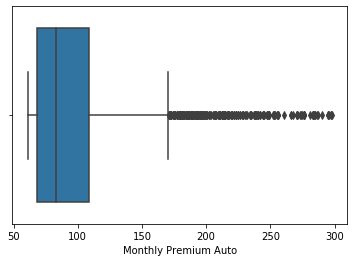

In [13]:
sns.boxplot(data['Monthly Premium Auto'])
plt.show()

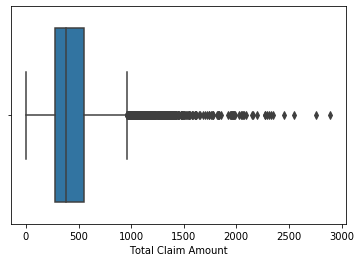

In [14]:
sns.boxplot(data['Total Claim Amount'])
plt.show()

### outliers in the total claim amount and also in monthly premium auto , usually we remove the outliers for a better model.
### since the dataset is related to insurance industry, we must be accept the outliers,as they can be our potential customers.
### And there are no outliers in the income.
### Conclusion: No outlier treatment required.

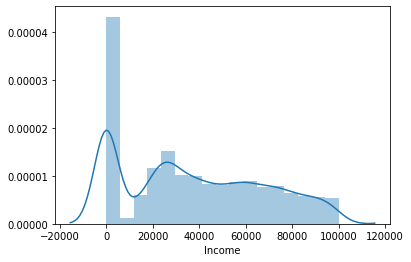

In [15]:
sns.distplot(data['Income'])
plt.show()

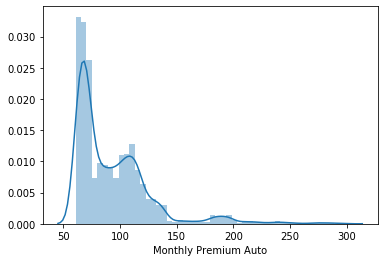

In [16]:
sns.distplot(data['Monthly Premium Auto'])
plt.show()

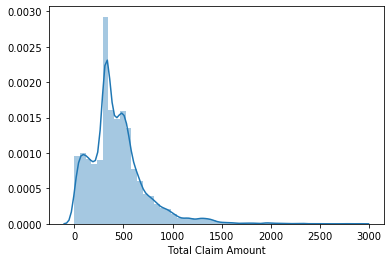

In [17]:
sns.distplot(data['Total Claim Amount'])
plt.show()

### none of the continuous variables are normally distributed.
### need to make the distributions normal
### Log transformation required

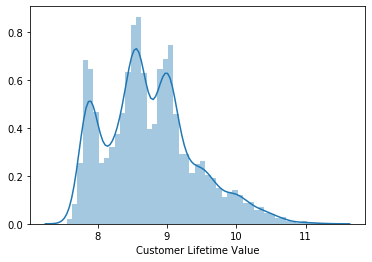

In [18]:
sns.distplot(np.log(data['Customer Lifetime Value']))

In [19]:
data['Log_CLV'] = np.log(data['Customer Lifetime Value'])

In [20]:
data['Log_CLV'].head()

0    7.924260
1    8.850738
2    9.464008
3    8.941920
4    7.942253
Name: Log_CLV, dtype: float64

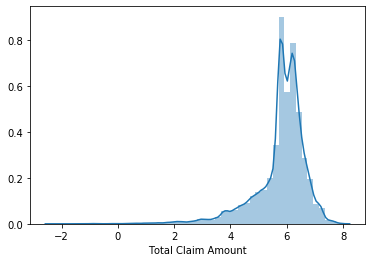

In [21]:
sns.distplot(np.log(data['Total Claim Amount']))
plt.show()

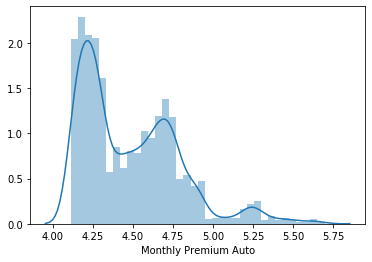

In [22]:
sns.distplot(np.log(data['Monthly Premium Auto']))

### Total claim amount and Monthly Premium Auto have multiple peaks and it is getting skewed after transformation
### So we stay with original distribution

## Bivariate Analysis

In [23]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Log_CLV
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253


In [24]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Log_CLV'],
      dtype='object')

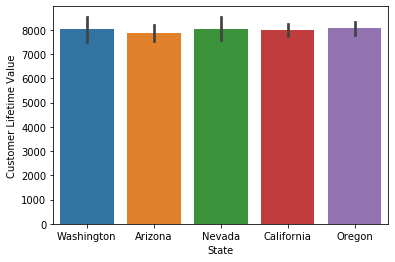

In [25]:
sns.barplot(x = 'State',y='Customer Lifetime Value',data = data)
plt.show()

### State dosen't affect CLV

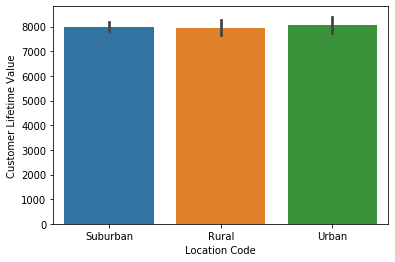

In [26]:
sns.barplot(x = 'Location Code',y='Customer Lifetime Value',data = data)
plt.show()

### CLV  is same for all locations
### We can drop it

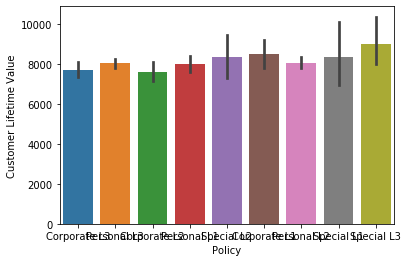

<Figure size 8640x7200 with 0 Axes>

In [27]:
sns.barplot(x = 'Policy',y='Customer Lifetime Value',data = data)
plt.figure(figsize=(120,100))
plt.show()

### Policy has a lot of variability
### Stats test needed

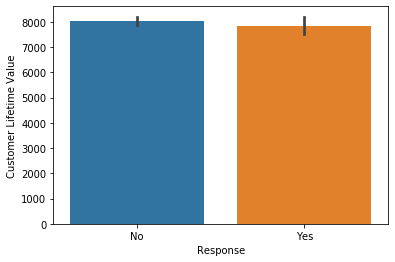

In [28]:
sns.barplot(x = 'Response',y='Customer Lifetime Value',data = data)
plt.show()

### we can drop this

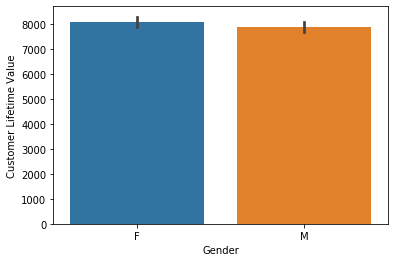

In [29]:
sns.barplot(x = 'Gender',y='Customer Lifetime Value',data = data)
plt.show()

### we can drop gender

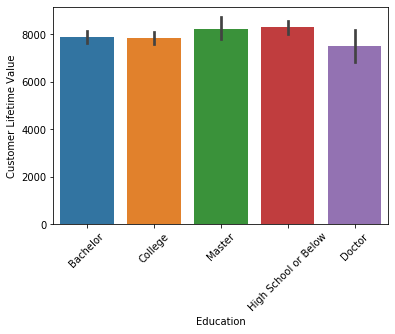

In [30]:
sns.barplot(x = 'Education',y='Customer Lifetime Value',data = data)
plt.xticks(rotation=45)
plt.show()

### Education is not  significant feature

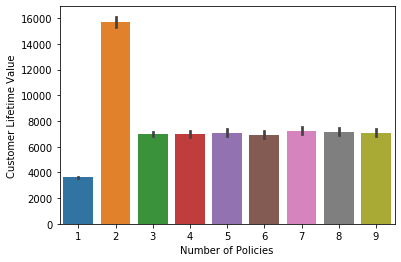

In [31]:
sns.barplot(x = 'Number of Policies',y='Customer Lifetime Value',data = data)
plt.show()

### customers who have taken only 1 policy have lower customer lifetime value
### the customers who have taken 2 policies have very high customer lifetime value comparitively.
### customers who have taken 3 or greater show a similar trend, so we can combine all of them into one bin

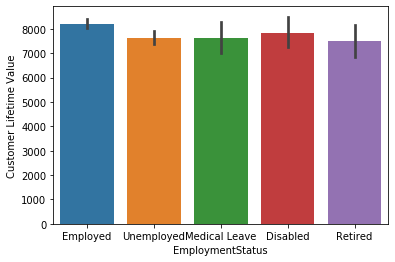

In [32]:
sns.barplot(x = 'EmploymentStatus',y='Customer Lifetime Value',data = data)

### Employed and Disabled Customers have highest CLV
### Unemployed,medical leave Customers have almost similar CLV 
### Retired Customers have lowest CLV
### Stats test required

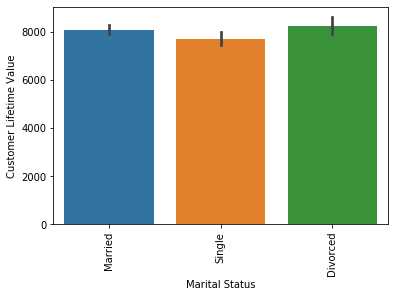

In [33]:
sns.barplot(x = 'Marital Status',y='Customer Lifetime Value',data = data)
plt.xticks(rotation = 90)
plt.show()

### Singles have lowest CLV
### Married and Divorced have higher CLVs
### Stats test required

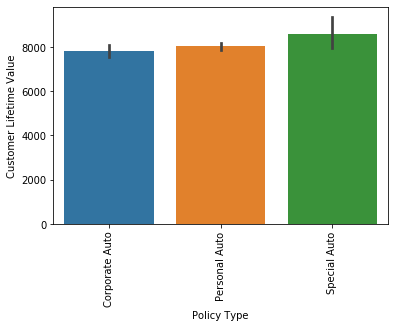

In [34]:
sns.barplot(x = 'Policy Type',y='Customer Lifetime Value',data = data)
plt.xticks(rotation = 90)
plt.show()

### CLV for corporate auto is lowest and Highest for Special Auto

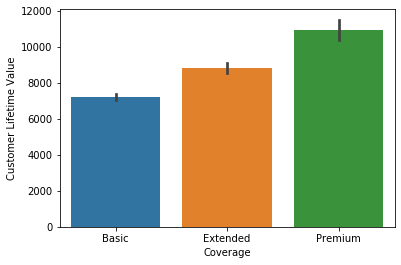

In [35]:
sns.barplot(x = 'Coverage',y='Customer Lifetime Value',data = data)
plt.show()

### CLV is different for different types of Coverage

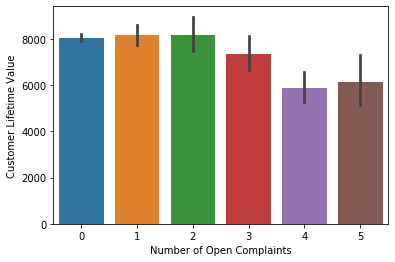

In [36]:
sns.barplot(x = 'Number of Open Complaints',y='Customer Lifetime Value',data = data)
plt.show()

### people who have complaints 2 or lesser have a similar pattern where as >3 do not show any pattern
### stat test needed

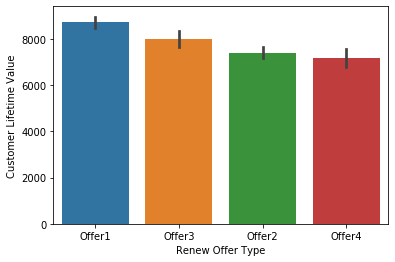

In [37]:
sns.barplot(x = 'Renew Offer Type',y='Customer Lifetime Value',data = data)
plt.show()

### Offer type is a good predictor

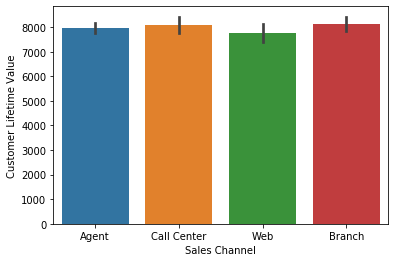

In [38]:
sns.barplot(x = 'Sales Channel',y='Customer Lifetime Value',data = data)
plt.show()

### CLV of customers who recieved sales calls from Call centre and Branch is higher than those from Agent and Web
### Stats test needed

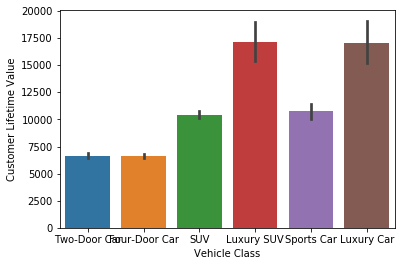

In [39]:
sns.barplot(x = 'Vehicle Class',y='Customer Lifetime Value',data = data)
plt.show()

### Customers with 2 and 4 door cars show similar trend and have lowest CLV
### Customers with SUV and Sports Car  show similar trend and have CLV greater than 2 and 4 door cars
### Customers with Luxury SUV and Luxury Cars show similar trend and have highest CLV

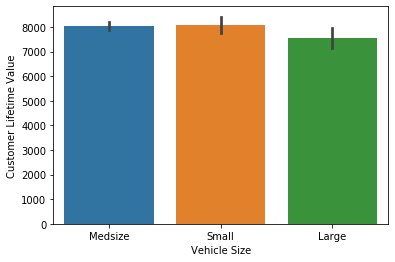

In [40]:
sns.barplot(x = 'Vehicle Size',y='Customer Lifetime Value',data = data)
plt.show()

### Customers with small and med size vehicles have higher CLV than large cars

In [41]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Log_CLV
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253


In [42]:
#data.info()

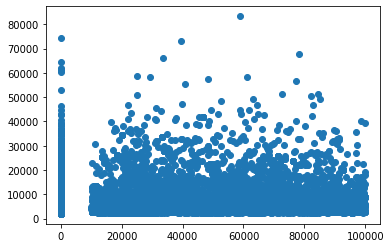

In [43]:
plt.scatter(x = 'Income',y = 'Customer Lifetime Value',data = data)

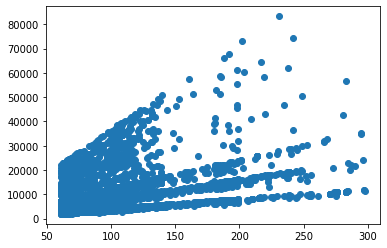

In [44]:
plt.scatter(x = 'Monthly Premium Auto',y = 'Customer Lifetime Value',data = data)

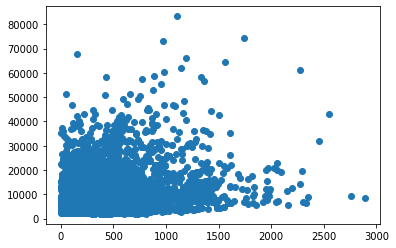

In [45]:
plt.scatter(x = 'Total Claim Amount',y = 'Customer Lifetime Value',data = data)

### Linear Coorelation exists between CLV and monthly premium auto
### No coorelation between Total Claim Amount and Income with CLV

In [46]:
data[['Income','Monthly Premium Auto','Total Claim Amount']].describe()

,Income,Monthly Premium Auto,Total Claim Amount
count,9134.000000,9134.000000,9134.000000
mean,37657.380009,93.219291,434.088794
std,30379.904734,34.407967,290.500092
min,0.000000,61.000000,0.099007
25%,0.000000,68.000000,272.258244
50%,33889.500000,83.000000,383.945434
75%,62320.000000,109.000000,547.514839
max,99981.000000,298.000000,2893.239678


In [47]:
data[['Income','Monthly Premium Auto','Total Claim Amount','Customer Lifetime Value']].corr()

,Income,Monthly Premium Auto,Total Claim Amount,Customer Lifetime Value
Income,1.000000,-0.016665,-0.355254,0.024366
Monthly Premium Auto,-0.016665,1.000000,0.632017,0.396262
Total Claim Amount,-0.355254,0.632017,1.000000,0.226451
Customer Lifetime Value,0.024366,0.396262,0.226451,1.000000


## Base Model

In [48]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Log_CLV'],
      dtype='object')

In [49]:
data1 = data.drop(columns = ['Customer','Log_CLV','Effective To Date'],axis = 1)
data1.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Scaling the Numerical Variables

In [50]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [51]:
cols_to_scale = ['Customer Lifetime Value','Income','Monthly Premium Auto','Total Claim Amount']
from sklearn.preprocessing import StandardScaler # Library for scaling
sc = StandardScaler()
data1[cols_to_scale] = sc.fit_transform(data1[cols_to_scale])
data1.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,-0.762878,No,Basic,Bachelor,Employed,F,0.612827,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,-0.169640,Two-Door Car,Medsize
1,Arizona,-0.149245,No,Extended,Bachelor,Unemployed,F,-1.239617,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,2.400737,Four-Door Car,Medsize
2,Nevada,0.710636,No,Premium,Bachelor,Employed,F,0.365710,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,0.455734,Two-Door Car,Medsize
3,California,-0.052263,No,Basic,Bachelor,Unemployed,M,-1.239617,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,0.329769,SUV,Medsize
4,Washington,-0.755575,No,Basic,Bachelor,Employed,M,0.203390,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,-1.018843,Four-Door Car,Medsize


### Label Encoding the Categorical Columns

In [52]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
 
    # Encode labels in column 'species'.
    data1[c1]= label_encoder.fit_transform(data1[c1])
 
    data1[c1].unique()
    return data

In [53]:
LABEL_ENCODING("State")
LABEL_ENCODING("Response")
LABEL_ENCODING("Coverage")
LABEL_ENCODING("Education")
LABEL_ENCODING("EmploymentStatus")
LABEL_ENCODING("Gender")
LABEL_ENCODING("Location Code")
LABEL_ENCODING("Marital Status")
LABEL_ENCODING("Policy Type")
LABEL_ENCODING("Policy")
LABEL_ENCODING("Renew Offer Type")
LABEL_ENCODING("Sales Channel")
LABEL_ENCODING("Vehicle Class")
LABEL_ENCODING("Vehicle Size")


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Log_CLV
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/2011,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,10.060747
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/2011,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,8.038031
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/2011,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,9.007476
9132,UP19263,California,7524.442436,No,Extended,College,2/3/2011,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,8.925912


In [54]:
data1.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,-0.762878,0,0,0,1,0,0.612827,1,1,...,5,0,1,0,2,0,0,-0.169640,5,1
1,0,-0.149245,0,1,0,4,0,-1.239617,1,2,...,42,0,8,1,5,2,0,2.400737,0,1
2,2,0.710636,0,2,0,1,0,0.365710,1,1,...,38,0,2,1,5,0,0,0.455734,5,1
3,1,-0.052263,0,0,0,4,1,-1.239617,1,1,...,65,0,7,0,1,0,2,0.329769,3,1
4,4,-0.755575,0,0,0,1,1,0.203390,0,2,...,44,0,1,1,3,0,0,-1.018843,0,1


In [55]:
X = data1.drop('Customer Lifetime Value',axis = 1)
y = data1['Customer Lifetime Value']

In [56]:
X.shape

(9134, 21)

In [57]:
y.shape

(9134,)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 123)

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_lr=lr.fit(x_train,y_train).predict(x_test)
model_lr

array([ 0.25825301,  0.52864135, -0.3575748 , ...,  0.01639284,
        0.12941951, -0.27919486])

In [60]:
from sklearn.metrics import r2_score,mean_squared_error

In [61]:
rmse = np.sqrt(mean_squared_error(y_test,model_lr))
rmse

0.9027938136627328

In [62]:
R2 = r2_score(y_test,model_lr)
R2

0.14214588498585734

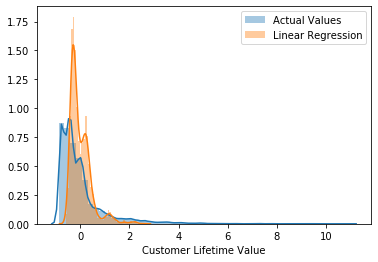

In [63]:
import seaborn as sns
sns.distplot(y,label='Actual Values')
sns.distplot(model_lr,label='Linear Regression')
plt.legend()
plt.show()

## Assumptions for linear regression

### Linearity

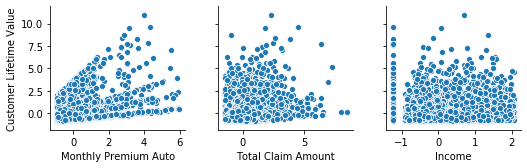

In [64]:
sns.pairplot(x_vars=['Monthly Premium Auto','Total Claim Amount','Income'],y_vars =['Customer Lifetime Value'],data = data1)
plt.show()

### No linear relationship - First assumption fails

### Independence

In [65]:

residuals = model_lr-y_test
mean_of_residuals = np.mean(residuals)
print(f"The mean of the residuals is {mean_of_residuals}")

The mean of the residuals is 0.0037924444370778447


### mean of the residuals is close to zero - Second assumption is true

### Homoscedasticity

In [66]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals,x_test)
lzip(name, test)

[('F statistic', 1.0249236783244198), ('p-value', 0.32559903342389507)]

#### H0: Error terms are homoscedastic

#### Ha: Error terms are not homoscedastic

#### p-value > 0.05,accept null hypothesis, error terms are homoscedastic

### Normality

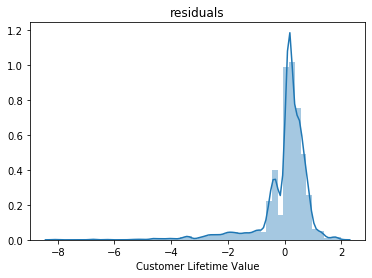

In [67]:
p = sns.distplot(residuals,kde=True)
p = plt.title('residuals')

### Error terms are not normal - Fourth assumption fails

## Stats Analysis for significant and non significant features

In [68]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

In [69]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Log_CLV'],
      dtype='object')

In [70]:
data.rename(columns= {'Location Code': 'Location_Code'}, inplace=True)

In [71]:
data.rename(columns= {'Marital Status': 'Marital_Status'}, inplace=True)
data.rename(columns= {'Monthly Premium Auto': 'Monthly_Premium_Auto'}, inplace=True)
data.rename(columns= {'Months Since Last Claim': 'Months_Since_Last_Claim'}, inplace=True)
data.rename(columns= {'Months Since Policy Inception': 'Months_Since_Policy_Inception'}, inplace=True)
data.rename(columns= {'Number of Open Complaints': 'Number_of_Open_Complaints'}, inplace=True)
data.rename(columns= {'Number of Policies': 'Number_of_Policies'}, inplace=True)
data.rename(columns= {'Policy Type': 'Policy_Type'}, inplace=True)
data.rename(columns= {'Renew Offer Type': 'Renew_Offer_Type'}, inplace=True)
data.rename(columns= {'Sales Channel': 'Sales_Channel'}, inplace=True)
data.rename(columns= {'Total Claim Amount': 'Total_Claim_Amount'}, inplace=True)
data.rename(columns= {'Vehicle Class': 'Vehicle_Class'}, inplace=True)
data.rename(columns= {'Vehicle Size': 'Vehicle_Size'}, inplace=True)

In [72]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size', 'Log_CLV'],
      dtype='object')

In [73]:
mod = ols("Log_CLV ~ State", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq      df         F    PR(>F)
State        1.296791     4.0  0.760407  0.550912
Residual  3892.128577  9129.0       NaN       NaN


In [74]:
mod = ols("Log_CLV ~ Response", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq      df         F  PR(>F)
Response     0.152653     1.0  0.358061  0.5496
Residual  3893.272714  9132.0       NaN     NaN


In [75]:
mod = ols("Log_CLV ~ Coverage", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq      df           F         PR(>F)
Coverage   195.203562     2.0  240.981182  1.027438e-102
Residual  3698.221805  9131.0         NaN            NaN


In [76]:
mod = ols("Log_CLV ~ Education", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
Education     5.145625     4.0  3.020257  0.016807
Residual   3888.279742  9129.0       NaN       NaN


In [77]:
mod = ols("Log_CLV ~ EmploymentStatus", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                       sum_sq      df         F    PR(>F)
EmploymentStatus    13.186820     4.0  7.756126  0.000003
Residual          3880.238547  9129.0       NaN       NaN


In [78]:
mod = ols("Log_CLV ~ Gender", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq      df         F    PR(>F)
Gender       0.477052     1.0  1.119058  0.290149
Residual  3892.948316  9132.0       NaN       NaN


In [79]:
mod = ols("Log_CLV ~ Location_Code", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq      df         F    PR(>F)
Location_Code     0.338876     2.0  0.397407  0.672072
Residual       3893.086491  9131.0       NaN       NaN


In [80]:
mod = ols("Log_CLV ~ Marital_Status", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                     sum_sq      df         F   PR(>F)
Marital_Status     6.293772     2.0  7.392139  0.00062
Residual        3887.131595  9131.0       NaN      NaN


In [81]:
mod = ols("Log_CLV ~ Months_Since_Last_Claim", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                              sum_sq      df        F    PR(>F)
Months_Since_Last_Claim     0.346493     1.0  0.81277  0.367326
Residual                 3893.078874  9132.0      NaN       NaN


In [82]:
mod = ols("Log_CLV ~ Months_Since_Policy_Inception", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                                    sum_sq      df         F    PR(>F)
Months_Since_Policy_Inception     0.006684     1.0  0.015677  0.900362
Residual                       3893.418683  9132.0       NaN       NaN


In [83]:
mod = ols("Log_CLV ~ Number_of_Open_Complaints", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                                sum_sq      df          F    PR(>F)
Number_of_Open_Complaints     8.014707     1.0  18.837211  0.000014
Residual                   3885.410661  9132.0        NaN       NaN


In [84]:
mod = ols("Log_CLV ~ Number_of_Policies", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                         sum_sq      df           F        PR(>F)
Number_of_Policies   149.075077     1.0  363.575386  1.624213e-79
Residual            3744.350290  9132.0         NaN           NaN


In [85]:
mod = ols("Log_CLV ~ Policy_Type", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                  sum_sq      df         F    PR(>F)
Policy_Type     2.062224     2.0  2.419482  0.089025
Residual     3891.363143  9131.0       NaN       NaN


In [86]:
mod = ols("Log_CLV ~ Policy", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq      df         F    PR(>F)
Policy       3.684789     8.0  1.080525  0.373305
Residual  3889.740579  9125.0       NaN       NaN


In [87]:
mod = ols("Log_CLV ~ Renew_Offer_Type", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                       sum_sq      df          F        PR(>F)
Renew_Offer_Type    64.280287     3.0  51.088777  9.745195e-33
Residual          3829.145081  9130.0        NaN           NaN


In [88]:
mod = ols("Log_CLV ~ Sales_Channel", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq      df         F    PR(>F)
Sales_Channel     1.690502     3.0  1.321971  0.265239
Residual       3891.734865  9130.0       NaN       NaN


In [89]:
mod = ols("Log_CLV ~ Vehicle_Class", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                    sum_sq      df           F  PR(>F)
Vehicle_Class   596.123946     5.0  330.052894     0.0
Residual       3297.301421  9128.0         NaN     NaN


In [90]:
mod = ols("Log_CLV ~ Vehicle_Size", data = data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq      df        F    PR(>F)
Vehicle_Size     3.546840     2.0  4.16288  0.015592
Residual      3889.878527  9131.0      NaN       NaN


In [91]:
data[['Income','Monthly_Premium_Auto','Total_Claim_Amount','Log_CLV']].corr()

,Income,Monthly_Premium_Auto,Total_Claim_Amount,Log_CLV
Income,1.000000,-0.016665,-0.355254,0.041950
Monthly_Premium_Auto,-0.016665,1.000000,0.632017,0.443666
Total_Claim_Amount,-0.355254,0.632017,1.000000,0.245374
Log_CLV,0.041950,0.443666,0.245374,1.000000


### Dropping State,Response,Location_Code,Months_Since_Policy_Inception

In [92]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Log_CLV
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253


In [93]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Log_CLV
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253


In [94]:
data2 = data.drop(columns = ['Customer','Customer Lifetime Value','Effective To Date','State','Response','Location_Code','Months_Since_Policy_Inception'],axis = 1)
data2.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Log_CLV
0,Basic,Bachelor,Employed,F,56274,Married,69,32,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,7.924260
1,Extended,Bachelor,Unemployed,F,0,Single,94,13,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,8.850738
2,Premium,Bachelor,Employed,F,48767,Married,108,18,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,9.464008
3,Basic,Bachelor,Unemployed,M,0,Married,106,18,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,8.941920
4,Basic,Bachelor,Employed,M,43836,Single,73,12,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,7.942253


In [95]:
cols_to_scale = ['Log_CLV','Income','Monthly_Premium_Auto','Total_Claim_Amount']
from sklearn.preprocessing import StandardScaler # Library for scaling
sc = StandardScaler()
data2[cols_to_scale] = sc.fit_transform(data2[cols_to_scale])
data2.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Log_CLV
0,Basic,Bachelor,Employed,F,0.612827,Married,-0.703925,32,0,1,Corporate Auto,Corporate L3,Offer1,Agent,-0.169640,Two-Door Car,Medsize,-1.262556
1,Extended,Bachelor,Unemployed,F,-1.239617,Single,0.022691,13,0,8,Personal Auto,Personal L3,Offer3,Agent,2.400737,Four-Door Car,Medsize,0.156500
2,Premium,Bachelor,Employed,F,0.365710,Married,0.429596,18,0,2,Personal Auto,Personal L3,Offer1,Agent,0.455734,Two-Door Car,Medsize,1.095826
3,Basic,Bachelor,Unemployed,M,-1.239617,Married,0.371467,18,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,0.329769,SUV,Medsize,0.296160
4,Basic,Bachelor,Employed,M,0.203390,Single,-0.587666,12,0,1,Personal Auto,Personal L1,Offer1,Agent,-1.018843,Four-Door Car,Medsize,-1.234997


In [96]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
 
    # Encode labels in column 'species'.
    data2[c1]= label_encoder.fit_transform(data2[c1])
 
    data2[c1].unique()
    return data2

In [97]:
LABEL_ENCODING("Coverage")
LABEL_ENCODING("Education")
LABEL_ENCODING("EmploymentStatus")
LABEL_ENCODING("Gender")
LABEL_ENCODING("Marital_Status")
LABEL_ENCODING("Policy_Type")
LABEL_ENCODING("Policy")
LABEL_ENCODING("Renew_Offer_Type")
LABEL_ENCODING("Sales_Channel")
LABEL_ENCODING("Vehicle_Class")
LABEL_ENCODING("Vehicle_Size")

,Coverage,Education,EmploymentStatus,Gender,Income,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Log_CLV
0,0,0,1,0,0.612827,1,-0.703925,32,0,1,0,2,0,0,-0.169640,5,1,-1.262556
1,1,0,4,0,-1.239617,2,0.022691,13,0,8,1,5,2,0,2.400737,0,1,0.156500
2,2,0,1,0,0.365710,1,0.429596,18,0,2,1,5,0,0,0.455734,5,1,1.095826
3,0,0,4,1,-1.239617,1,0.371467,18,0,7,0,1,0,2,0.329769,3,1,0.296160
4,0,0,1,1,0.203390,2,-0.587666,12,0,1,1,3,0,0,-1.018843,0,1,-1.234997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,1,1,1.128558,1,-0.587666,18,0,2,1,3,1,3,-0.811934,0,1,2.009832
9130,1,1,1,0,-0.528450,0,-0.413278,14,0,1,0,2,0,1,-0.188956,0,1,-1.088297
9131,1,0,4,1,-1.239617,2,-0.238891,9,3,2,0,1,0,1,1.227937,0,1,0.396571
9132,1,1,1,1,-0.517356,1,0.080820,34,0,3,1,4,2,1,0.885113,0,0,0.271642


In [98]:
X = data2.drop('Log_CLV',axis = 1)
y = data2.Log_CLV

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 123)

### Linear Regression

In [100]:
lr = LinearRegression()
model_lr=lr.fit(x_train,y_train).predict(x_test)
model_lr

array([ 0.23785247,  0.58423566, -0.53410213, ..., -0.01817991,
        0.03086056, -0.38091049])

In [101]:
rmse = np.sqrt(mean_squared_error(y_test,model_lr))
rmse

0.8707246061882153

In [102]:
R2 = r2_score(y_test,model_lr)
R2

0.2265924076014192

### Decision Tree

In [103]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
model_dr = dr.fit(x_train,y_train).predict(x_test)

In [104]:
rmse = np.sqrt(mean_squared_error(y_test,model_dr))
rmse

0.42347923595666526

In [105]:
R2 = r2_score(y_test,model_dr)
R2

0.8170590046195062

### Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [107]:
model_rf=rf.fit(x_train,y_train).predict(x_test)
model_rf

array([ 1.39318177,  0.69362996, -1.22947156, ...,  1.16776073,
        1.36681339, -0.32911094])

In [108]:
rmse = np.sqrt(mean_squared_error(y_test,model_rf))
rmse

0.305828586889153

In [109]:
R2 = r2_score(y_test,model_rf)
R2

0.9045880104144713

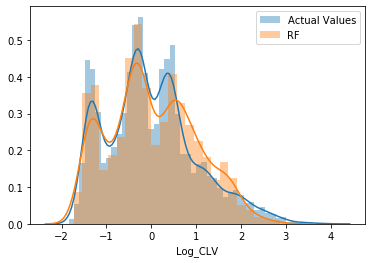

In [110]:
import seaborn as sns
sns.distplot(y,label='Actual Values')
sns.distplot(model_rf,label='RF')
plt.legend()
plt.show()

### SVM

In [111]:
from sklearn import svm

In [112]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf') 
model_svm = regressor.fit(x_train,y_train).predict(x_test)

In [113]:
rmse = np.sqrt(mean_squared_error(y_test,model_svm))
rmse

0.8554062657752021

In [114]:
R2 = r2_score(y_test,model_svm)
R2

0.2535655926894511

In [117]:
# Saving the model
import joblib
joblib.dump(model_rf, 'best_model.pkl')

['best_model.pkl']